In [6]:
import output.plotter as plotter
import setup.graph_creator as graph_creator
import setup.init_edge_weights as init_edge_weights
import setup.init_starting_values as init_starting_values
import simulation.run_average_consensus as simulation

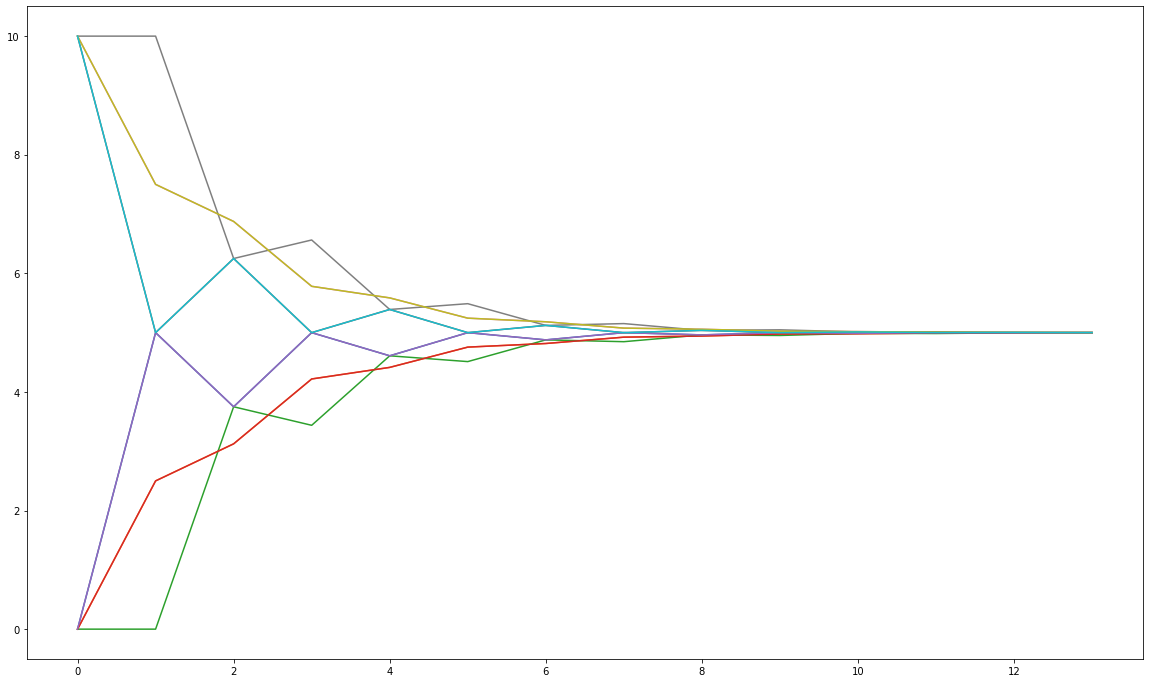

In [7]:
num_nodes = 10
num_neighbors = 4
laplacian = graph_creator.get_lattice_ring(num_nodes, num_neighbors)
values = init_starting_values.grouped(num_nodes, 0, 10)
edge_weights = init_edge_weights.optimal_constant(laplacian, num_nodes)
values_by_round = simulation.run_avg_consensus(values, edge_weights)

plotter.plot_values_by_round(values_by_round)

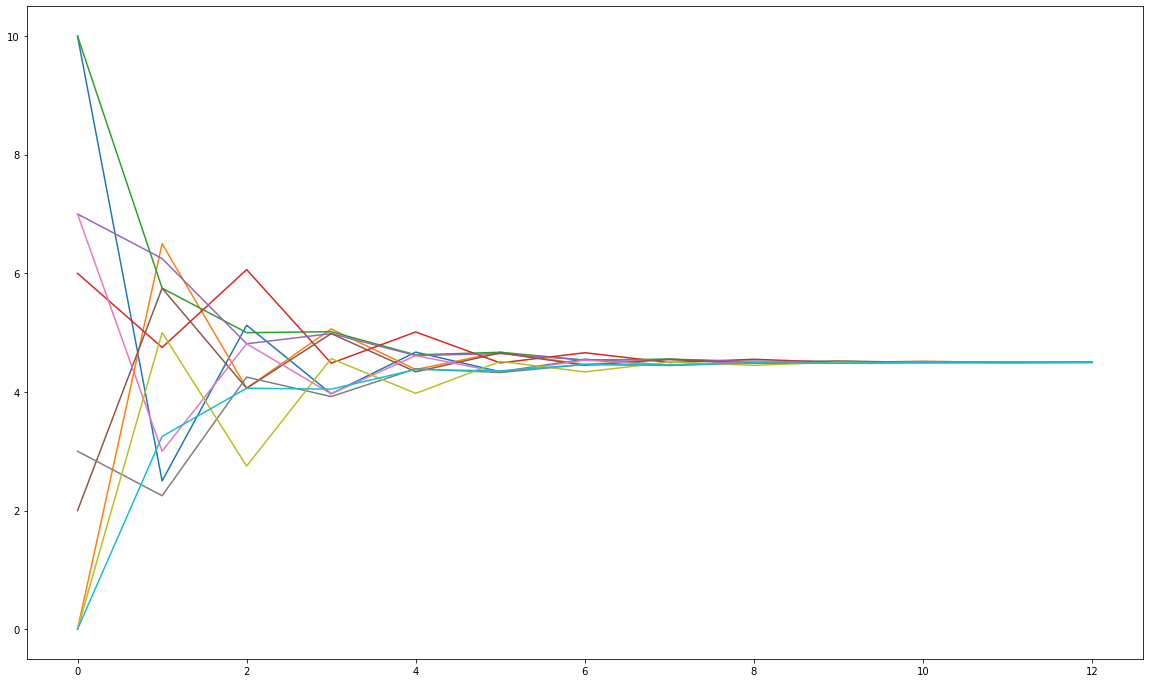

In [8]:
num_nodes = 10
num_neighbors = 4
laplacian = graph_creator.get_lattice_ring(num_nodes, num_neighbors)
values = init_starting_values.random_ints(num_nodes, 10)
edge_weights = init_edge_weights.local_degree(laplacian, num_nodes)
values_by_round = simulation.run_avg_consensus(values, edge_weights)

plotter.plot_values_by_round(values_by_round)

Running for num_nodes: 10
Running for num_nodes: 15
Running for num_nodes: 20
Running for num_nodes: 25
Running for num_nodes: 30
Running for num_nodes: 35
Running for num_nodes: 40
Running for num_nodes: 45
Running for num_nodes: 50
Running for num_nodes: 55
Running for num_nodes: 60
Running for num_nodes: 65
Running for num_nodes: 70
Running for num_nodes: 75
Running for num_nodes: 80
Running for num_nodes: 85
Running for num_nodes: 90
Running for num_nodes: 95
Running for num_nodes: 100
Running for num_nodes: 105
Running for num_nodes: 110
Running for num_nodes: 115
Running for num_nodes: 120
Running for num_nodes: 125
Running for num_nodes: 130
Running for num_nodes: 135
Running for num_nodes: 140
Running for num_nodes: 145
Running for num_nodes: 150
Running for num_nodes: 155
Running for num_nodes: 160
Running for num_nodes: 165
Running for num_nodes: 170
Running for num_nodes: 175
Running for num_nodes: 180
Running for num_nodes: 185
Running for num_nodes: 190
Running for num_nod

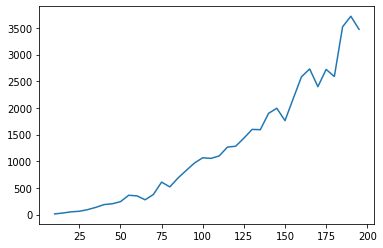

In [9]:
import matplotlib.pyplot as plt

num_rounds_to_stop = []
num_nodes = []
for num_nodes in range(10, 200, 5):
    print("Running for num_nodes: " + str(num_nodes))
    num_neighbors = 4
    laplacian = graph_creator.get_lattice_ring(num_nodes, num_neighbors)
    values = init_starting_values.random_ints(num_nodes, 10)
    edge_weights = init_edge_weights.local_degree(laplacian, num_nodes)
    values_by_round = simulation.run_avg_consensus(values, edge_weights)
    num_rounds_to_stop.append(len(values_by_round))

print("Plotting result: " + str(num_rounds_to_stop))
plt.plot(range(10, 200, 5), num_rounds_to_stop)
plt.show()